In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path Objects
BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "data"

In [3]:
df = pd.read_csv(DATA_DIR / "raw_data.csv")

# Class Distribution
Phishing = 1
Benign = 0

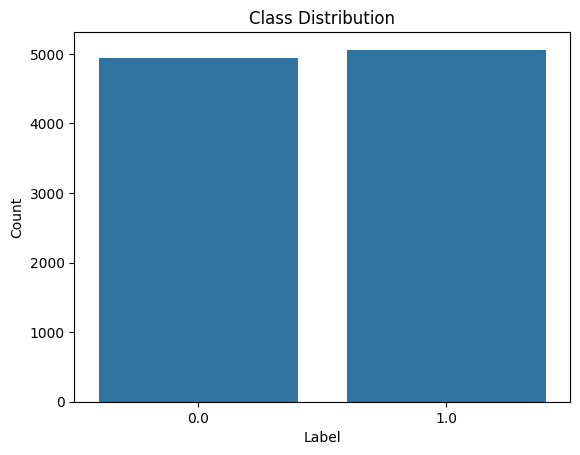

In [4]:
# Example: Visualize class distribution
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Percentage of Distribution

In [5]:
# Convert to percentages
percentages = df['label'].value_counts(normalize=True) * 100
print(percentages)

label
1.0    50.6
0.0    49.4
Name: proportion, dtype: float64


# Train Test Split

In [6]:
from extract import Extract
from config import TEST_SIZE, VALIDATE_SIZE, RANDOM_STATE

extractor = Extract()
train_df, val_df, test_df = extractor.get_splits()

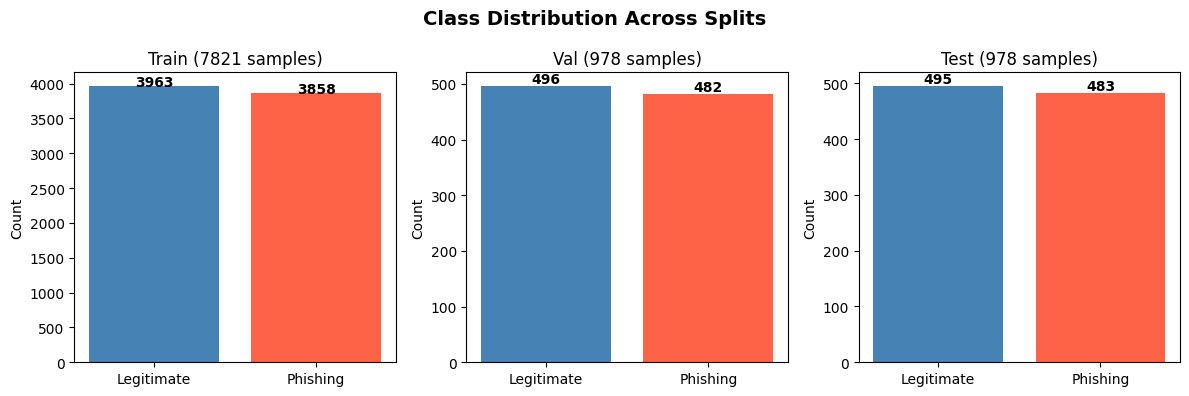

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

splits = {'Train': train_df, 'Val': val_df, 'Test': test_df}

for ax, (name, df) in zip(axes, splits.items()):
    counts = df['label'].value_counts()
    ax.bar(['Legitimate', 'Phishing'], counts.values, color=['steelblue', 'tomato'])
    ax.set_title(f'{name} ({len(df)} samples)')
    ax.set_ylabel('Count')
    for i, v in enumerate(counts.values):
        ax.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.suptitle('Class Distribution Across Splits', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()